### Calexise
Small application for predicting your burnt calories during exercise sessions

In [15]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded1 = files.upload()

Saving exercise.csv to exercise.csv


In [3]:
uploaded2 = files.upload()

Saving calories.csv to calories.csv


In [4]:
import io
df_ex = pd.read_csv(io.BytesIO(uploaded1['exercise.csv']))

In [5]:
df_ex.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
df_cal = pd.read_csv(io.BytesIO(uploaded2['calories.csv']))
df_cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [7]:
df = pd.merge(df_ex, df_cal, on='User_ID')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
df['Gender'] = pd.get_dummies(df['Gender'], prefix_sep='_', drop_first=True)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


User_ID      -0.001661
Gender        0.022357
Age           0.154395
Height        0.017537
Weight        0.035481
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Calories      1.000000
Name: Calories, dtype: float64


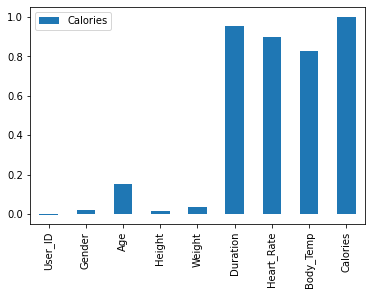

In [9]:
# finding correlation bw calories with all other features one by one
correlation = df.corr()['Calories']
print(correlation) 
correlation.to_frame().plot.bar()

In [10]:
# dropping User_ID since it shows negative correlation and do nothing in predicting the calorie values
df = df.drop(columns=['User_ID'], axis=1)   
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


From correlation plot it is clear that Duration, Heart_rate, Body_temperature are the features that affect the value of calorie burnt the most

Let's rename the variable:

* $d$ : Duration
* $h$ : Heart_rate
* $T$ : Body_Temp
* $A$ : Age
* $W$ : Weight
* $G$ : Gender
* $H$ : Height
* $C$ : Calories

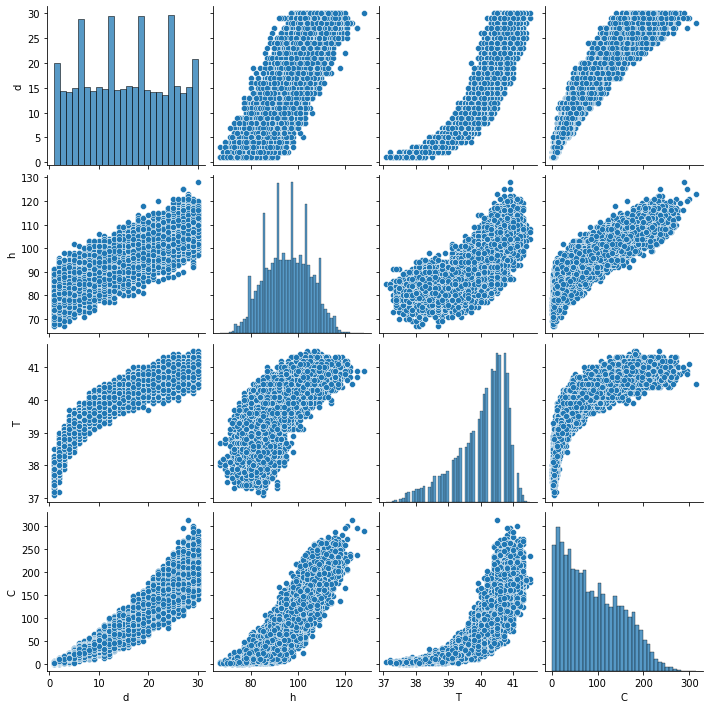

In [13]:
# sns.pairplot(df)
df_3f = df[['Duration','Heart_Rate','Body_Temp','Calories']].copy()
df_3f.rename(columns={'Duration':'d',
                     'Heart_Rate':'h',
                     'Body_Temp':'T',
                     'Calories':'C'}, inplace = True)

df_6f = df[['Duration','Heart_Rate','Body_Temp','Height','Weight','Age','Calories']].copy()
df_6f.rename(columns={'Duration':'d',
                     'Heart_Rate':'h',
                     'Body_Temp':'T',
                     'Calories':'C',
                     'Height':'H',
                     'Weight':'W',
                     'Age':'A'}, inplace = True)

df_7f = df[['Duration','Heart_Rate','Body_Temp','Height','Weight','Age','Gender','Calories']].copy()
df_7f.rename(columns={'Duration':'d',
                     'Heart_Rate':'h',
                     'Body_Temp':'T',
                     'Calories':'C',
                     'Height':'H',
                     'Weight':'W',
                     'Age':'A',
                     'Gender':'G'}, inplace = True)

sns.pairplot(df_3f)

From this scatter plot, it's clear that the relation b/w *Duration, Body_Temp,  Heart_rate* and *Calories* is not linear. It's possible that a quadratic approach might reduce the error

## One feature Regression

In [28]:
# split into test train data

C_i = df_3f['C'].to_numpy()
d_i = df_3f['d'].to_numpy()

d_train, d_test, C_train, C_test = train_test_split(d_i, C_i, test_size=0.33, random_state = 42)


First of all, let's see the relation b/w duration and calories as they are most correlated 

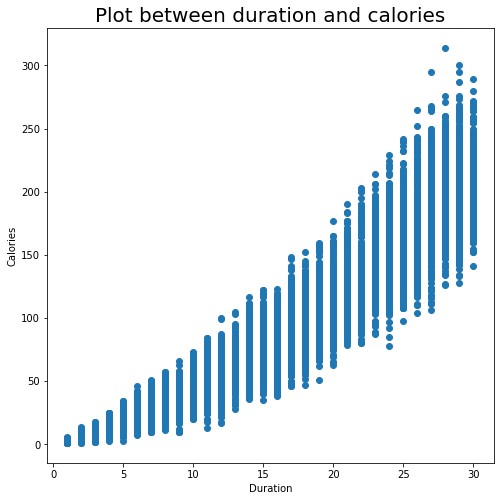

In [29]:
plt.figure(figsize=(8,8))
plt.scatter(df_3f['d'], df_3f['C'])
plt.ylabel('Calories')
plt.xlabel('Duration')
plt.title('Plot between duration and calories', size=20)
plt.show()

## Linear model


In [30]:
# create a linear regression object
lin_reg = linear_model.LinearRegression()

# Train the data using training data
lin_reg.fit(d_train.reshape(-1, 1), C_train.reshape(-1, 1))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Calories')

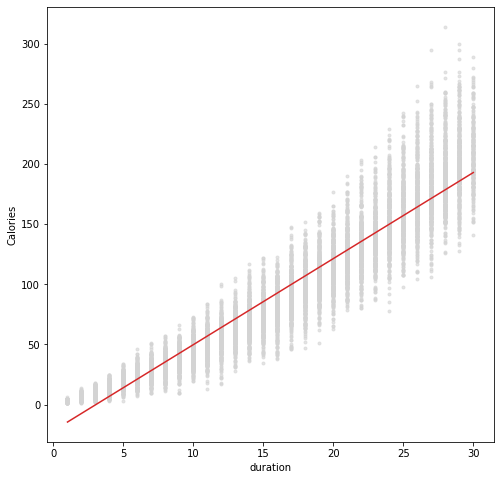

In [47]:
# selecting an interval for duration
d_val = np.linspace(d_i.min(), d_i.max(), 100)

# predicting 
C_lin_model = lin_reg.predict(d_val.reshape(-1, 1))

#plotting
plt.figure(figsize=(8,8))
plt.scatter(df['Duration'],df['Calories'],c='lightgray',label = 'observations',alpha = 0.6,marker='.',zorder=1)
plt.plot(d_val, C_lin_model, c='tab:red', ls='-', zorder=2)
plt.xlabel('duration')
plt.ylabel('Calories')

In [33]:
# prediction for test set
C_lin_test = lin_reg.predict(d_test.reshape(-1,1))

print('mean_squared_error : ', mean_absolute_error(C_test, C_lin_test))
print('R2 value : ', r2_score(C_test, C_lin_test))

mean_squared_error :  13.61296478201726
R2 value :  0.9127485305003333


In [34]:
# predicting calorie burnt in 25 minutes(duration)
pr = lin_reg.predict([[25]])
print(pr)

[[157.11930405]]


In [36]:
# small example showing how to take input from the user and then do the prediction
i = int(input())
print(lin_reg.predict([[i]]))

25
[[157.11930405]]


## Quadratic model

Text(0.5, 1.0, 'Calories burned vs Duration of exercise')

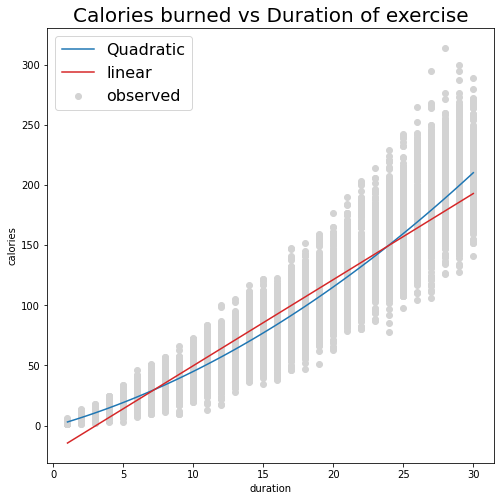

In [46]:
from sklearn.preprocessing import PolynomialFeatures

# create a linear regression object
quad_reg = linear_model.LinearRegression()

# reshaping features
D_train = d_train.reshape(-1, 1)

# Transform features to polynomial regression
quad = PolynomialFeatures(degree=2)
D_train_quad = quad.fit_transform(D_train)

# Training
quad_reg.fit(D_train_quad, C_train.reshape(-1, 1))

# Selecting a interval for duration and adapting shape
D_val = np.linspace(d_i.min(), d_i.max(),100).reshape(-1, 1)
D_val_quad = quad.fit_transform(D_val)

# Predicting values
C_quad_model =  quad_reg.predict(D_val_quad)

# Plotting
plt.figure(figsize=(8,8))
plt.plot(D_val, C_quad_model, c='tab:blue', label='Quadratic')
plt.scatter(df['Duration'], df['Calories'], c='lightgray', label='observed')
plt.plot(d_val, C_lin_model, c='tab:red', ls='-', zorder=2, label='linear') # comparison with linear model
plt.xlabel('duration')
plt.ylabel('calories')
plt.legend(prop={'size':16})
plt.title('Calories burned vs Duration of exercise', size = 20)

### Similarly we can also carry out regression using two, three, four ... features at a time and analyse the MSE and R2 of the model
As we will increse the count of features in the model, MSE will decrease and R2 will increase gradually.

Now let's perform regression analysis using all the features : ['Duration','Heart_Rate','Body_Temp','Height','Weight','Age','Gender','Calories']

## Regression with all features

In [49]:
X_i = df_7f[['d','h','T','A','G','W','H']].to_numpy()
C_i = df_7f[['C']].to_numpy().reshape(-1, 1)
X_trn, X_tst, C_trn, C_tst = train_test_split(X_i, C_i, test_size=0.33, random_state = 42)

### Linear regression

In [53]:
# create regression object
ML7 = linear_model.LinearRegression()

# train model 
ML7.fit(X_trn, C_trn)

# prediction
C_ml7_tst = ML7.predict(X_tst)

# error calculation
print('Mean absolute error : ', mean_absolute_error(C_tst, C_ml7_tst))
print('R2 score : ', r2_score(C_tst, C_ml7_tst))

filename1 = 'linear_model.sav'
pickle.dump(ML7, open(filename1, 'wb'))


Mean absolute error :  8.45059489671852
R2 score :  0.9663701348612176


### Quadratic regression

In [54]:
# create regression object
MQ7 = linear_model.LinearRegression()

MQ7_poly = PolynomialFeatures(degree = 2)

X_trn_pl = MQ7_poly.fit_transform(X_trn)
X_tst_pl = MQ7_poly.fit_transform(X_tst)

# training
MQ7.fit(X_trn_pl, C_trn)

# prediction
C_mq7_tst = MQ7.predict(X_tst_pl)

# this model can also be pickled just same as linear model

filename2 = 'quad_model.sav'
pickle.dump(MQ7, open(filename2, 'wb'))

# error calculation
print('Mean absolute error : ', mean_absolute_error(C_tst, C_mq7_tst))
print('R2 score : ', r2_score(C_tst, C_mq7_tst))

Mean absolute error :  2.2385493727371046
R2 score :  0.9976653870185921


As you can see that MSE decreased in quadratic regression in comparison to linear model

Also R2 score increased by using quadratic(degree = 2) model 

In [73]:
loaded_model_l = pickle.load(open(filename1, 'rb'))
# pre = int(input())
# print(loaded_model_l.predict([pre].to_numpy().reshape(-1, 1)))
# 'd','h','T','A','G','W','H'
# print(loaded_model_l.predict(np.array([['25','130','38.0','22','1','53.0','170.0']])).astype(np.float64))
ar = ['25','130','38.0','22','1','53.0','170.0']
arr = np.array(ar)
arr = arr.astype(np.float64)
print(loaded_model_l.predict([arr]))

[[238.42637951]]
